Data does not contain any text and column names looks correct so no need to deal with thoose.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import warnings

In [2]:
df = pd.read_csv("creditcard.csv")
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No empty rows

In [3]:
print(df.info())
p = df.isnull().sum()
p = p.sort_values()
print(p)

<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

# Exploratory statistical analysis

In [4]:
print(df[["Time", "Amount", "Class"]].describe())

                Time         Amount          Class
count  284807.000000  284807.000000  284807.000000
mean    94813.859575      88.349619       0.001727
std     47488.145955     250.120109       0.041527
min         0.000000       0.000000       0.000000
25%     54201.500000       5.600000       0.000000
50%     84692.000000      22.000000       0.000000
75%    139320.500000      77.165000       0.000000
max    172792.000000   25691.160000       1.000000


## Class based

Data is pretty unbalanced as we can see

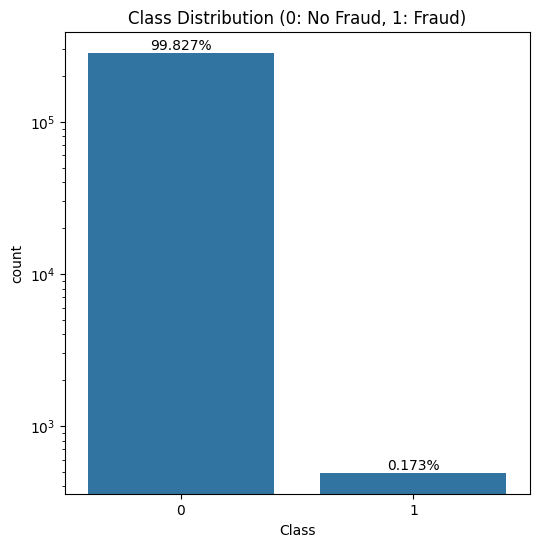

In [5]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0: No Fraud, 1: Fraud)")
plt.yscale("log") # Log scale to see better
# calculation of percentages
total = len(df)
for p in ax.patches:
    percentage = "{:.3f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="bottom")
plt.show()

## Time based

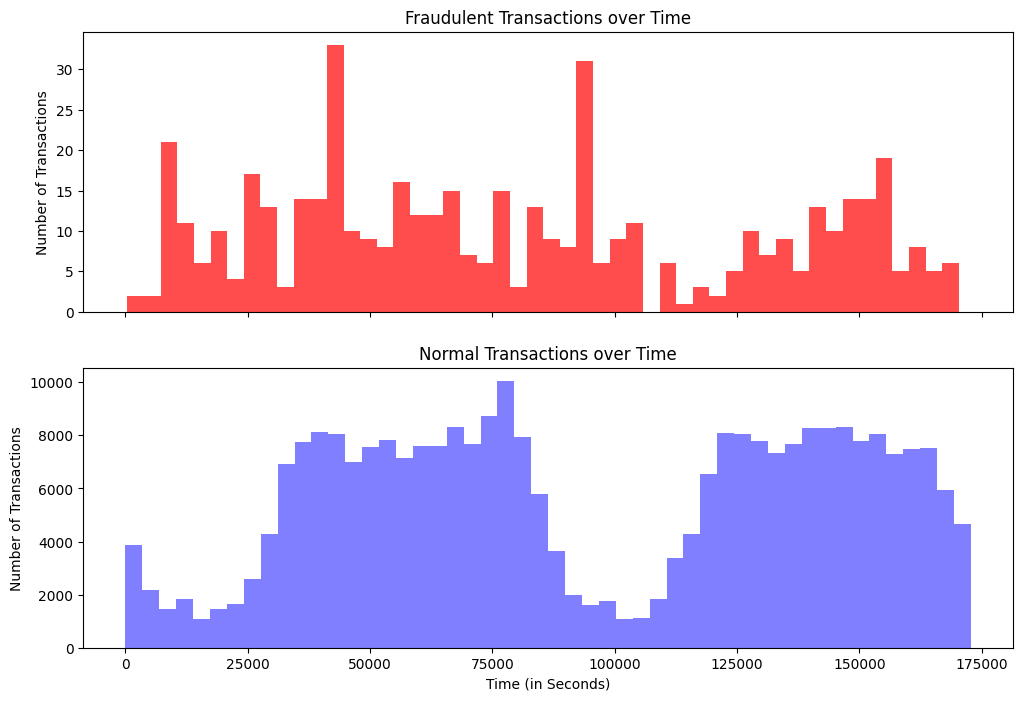

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.hist(df.Time[df.Class == 1], bins=50, color="red", alpha=0.7)
ax1.set_title("Fraudulent Transactions over Time")
ax1.set_ylabel("Number of Transactions")

ax2.hist(df.Time[df.Class == 0], bins=50, color="blue", alpha=0.5)
ax2.set_title("Normal Transactions over Time")
ax2.set_xlabel("Time (in Seconds)")
ax2.set_ylabel("Number of Transactions")
plt.show()

## Amount based

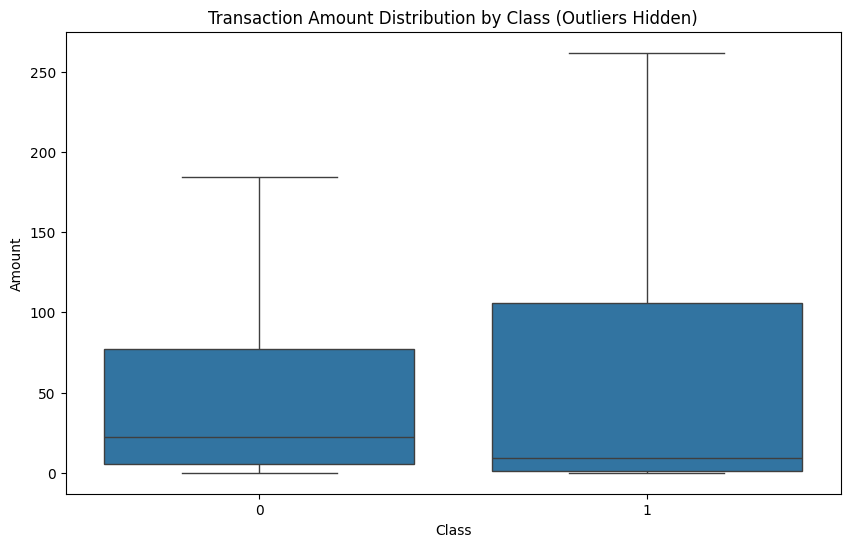

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Class", y="Amount", data=df, showfliers=False) # Hiding extreme outliers for clarity
plt.title("Transaction Amount Distribution by Class (Outliers Hidden)")
plt.show()

## Correlation

this chart actually not that usefull in this case because most of correlations close to 0

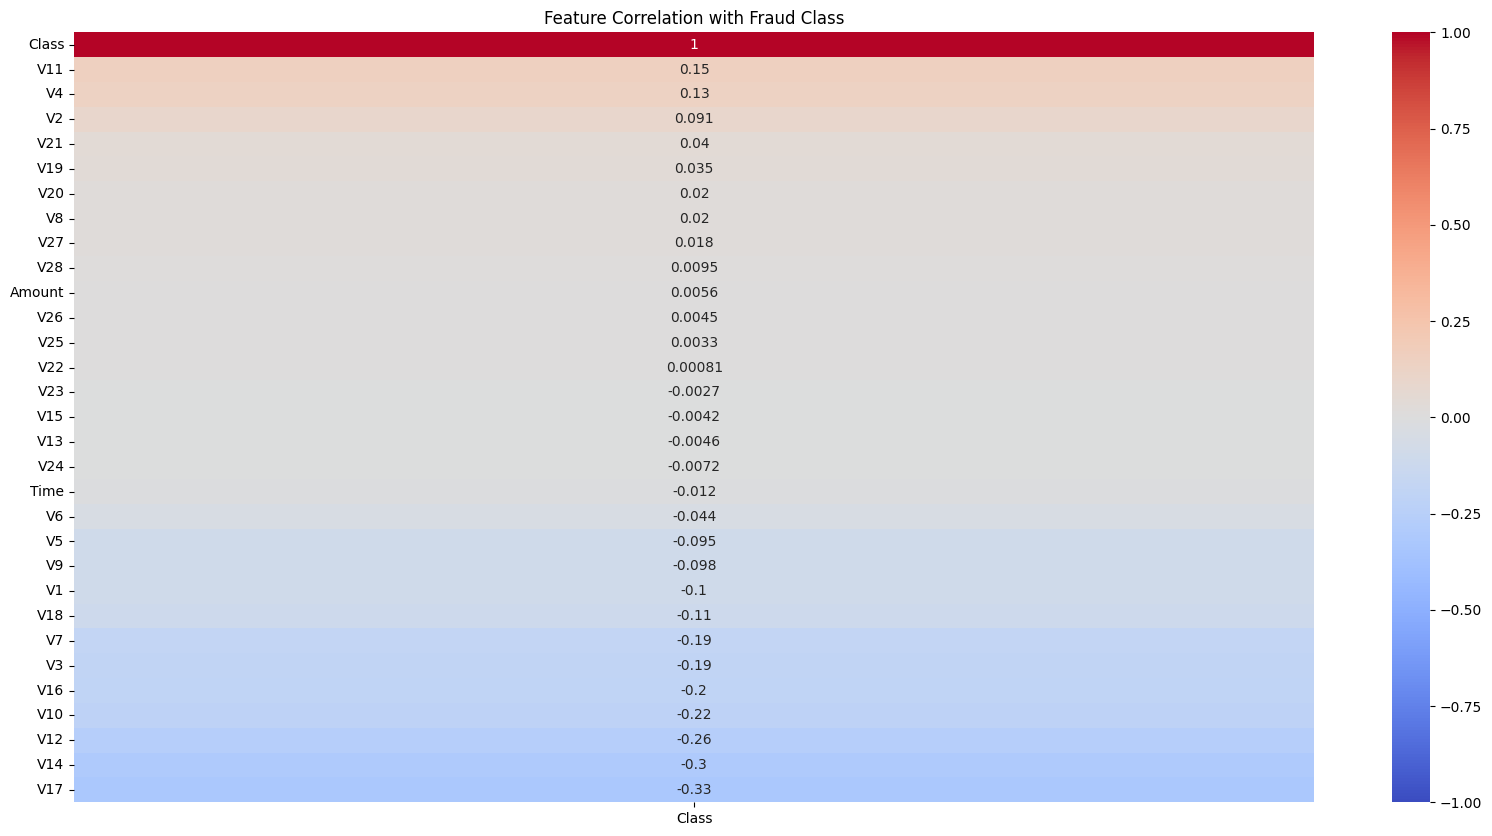

In [8]:
plt.figure(figsize=(20, 10))
# Calculate correlation
corr = df.corr()
# We focus on correlations with "Class" specifically
sns.heatmap(corr[["Class"]].sort_values(by="Class", ascending=False), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation with Fraud Class")
plt.show()

we take the most correlated or negatively correlated categories

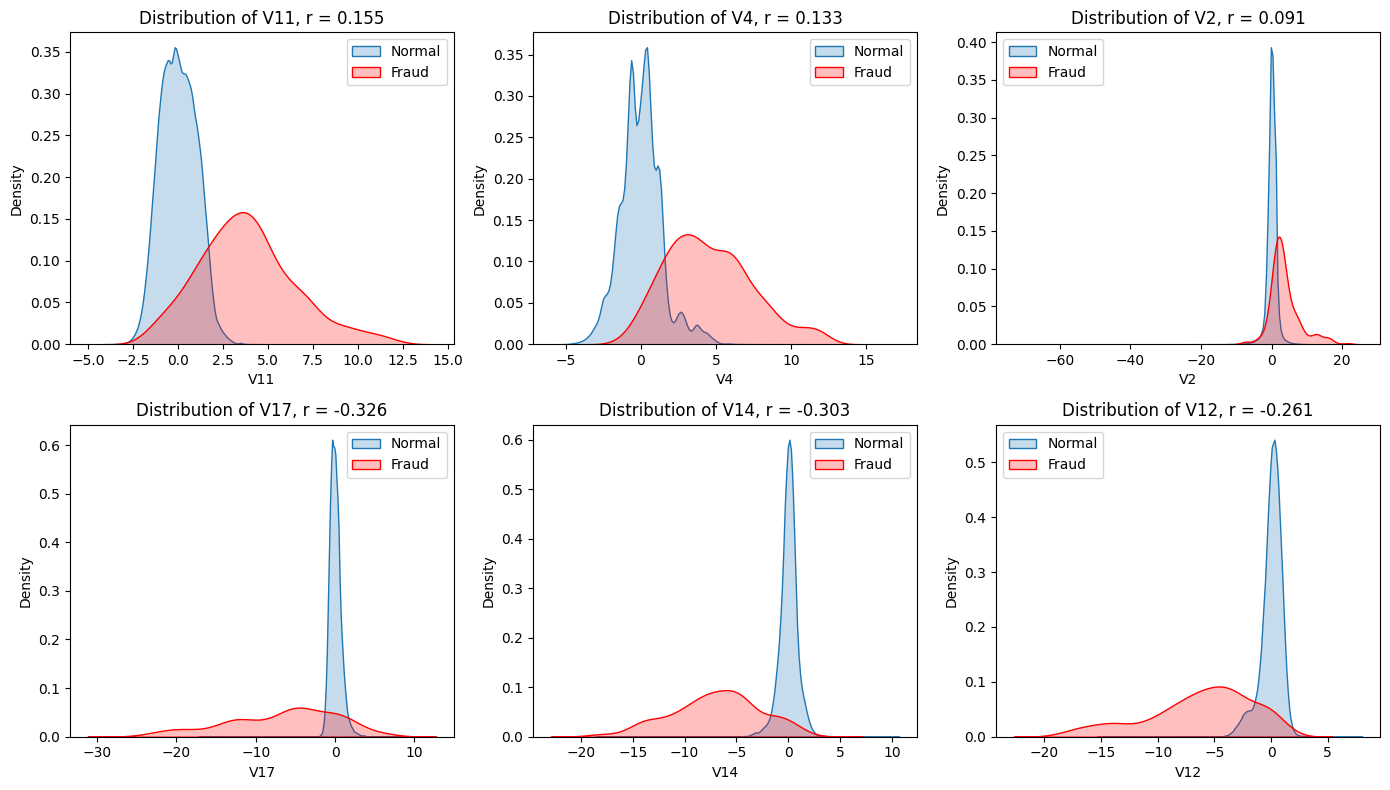

In [9]:
correlations = df.corrwith(df["Class"]).sort_values(ascending=False)
features_to_check = correlations.drop("Class").nlargest(3).index.tolist() + correlations.drop("Class").nsmallest(3).index.tolist()

plt.figure(figsize=(14, 8))
for i, col in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df[df["Class"] == 0][col], label="Normal", fill=True)
    sns.kdeplot(df[df["Class"] == 1][col], label="Fraud", fill=True, color="red")
    plt.title(f"Distribution of {col}, r = {(correlations[col]):.3f}")
    plt.legend()
plt.tight_layout()
plt.show()

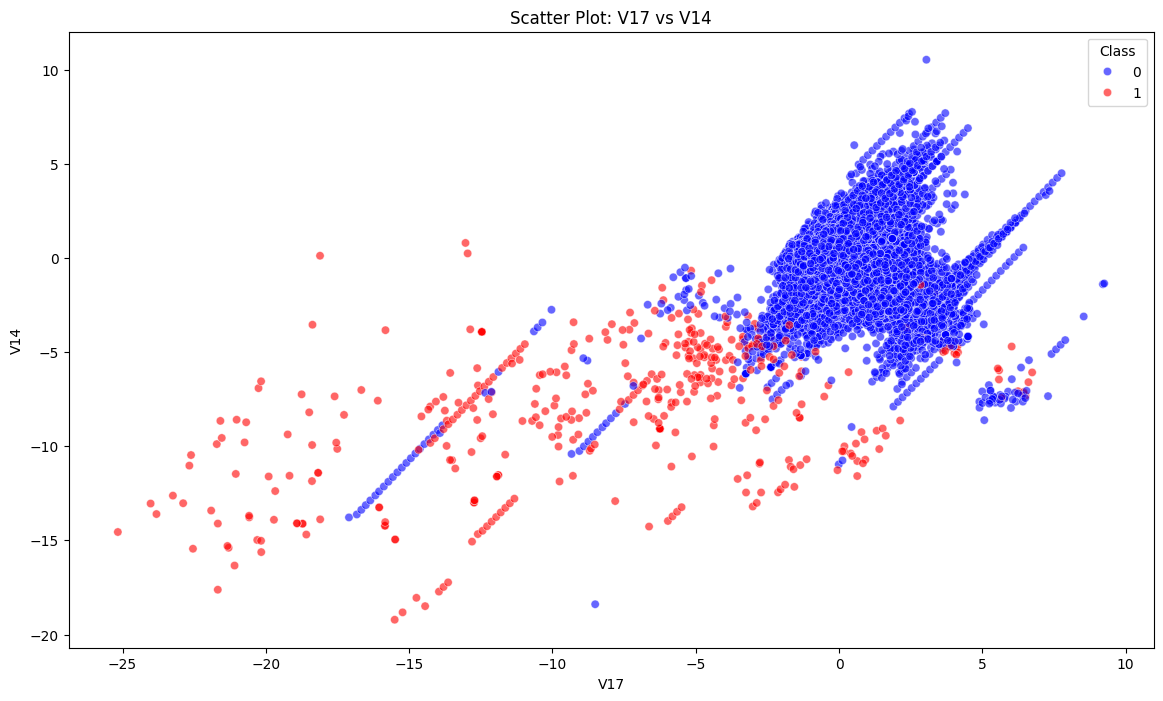

In [10]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x="V17", y="V14", hue="Class", data=df, alpha=0.6, palette={0:"blue", 1:"red"})
plt.title("Scatter Plot: V17 vs V14")
plt.show()

Feature importances with random forest algoritm

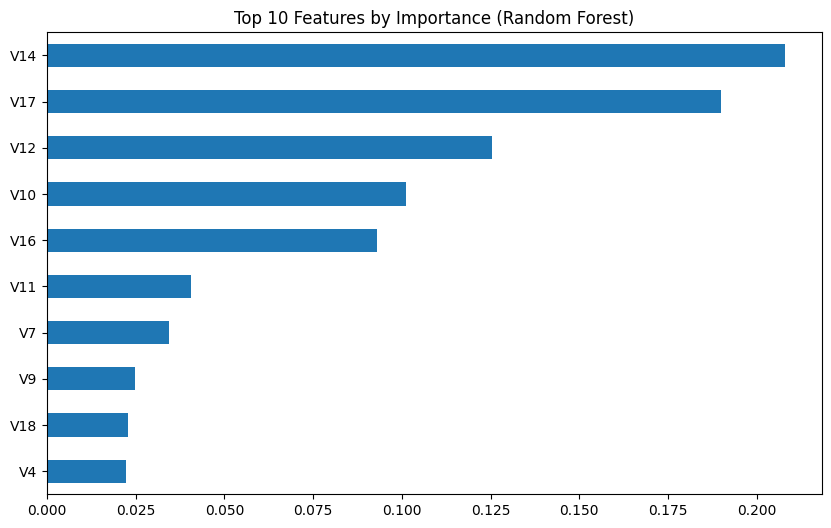

In [11]:
X = df.drop("Class", axis=1)
y = df["Class"]

# Initialize a small model just for importance extraction
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Plotting importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
importances.plot(kind="barh", title="Top 10 Features by Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

## Time of the day based analysis
One thing is pretty surprising, i would expect that frauds to concentrate in the night hours.

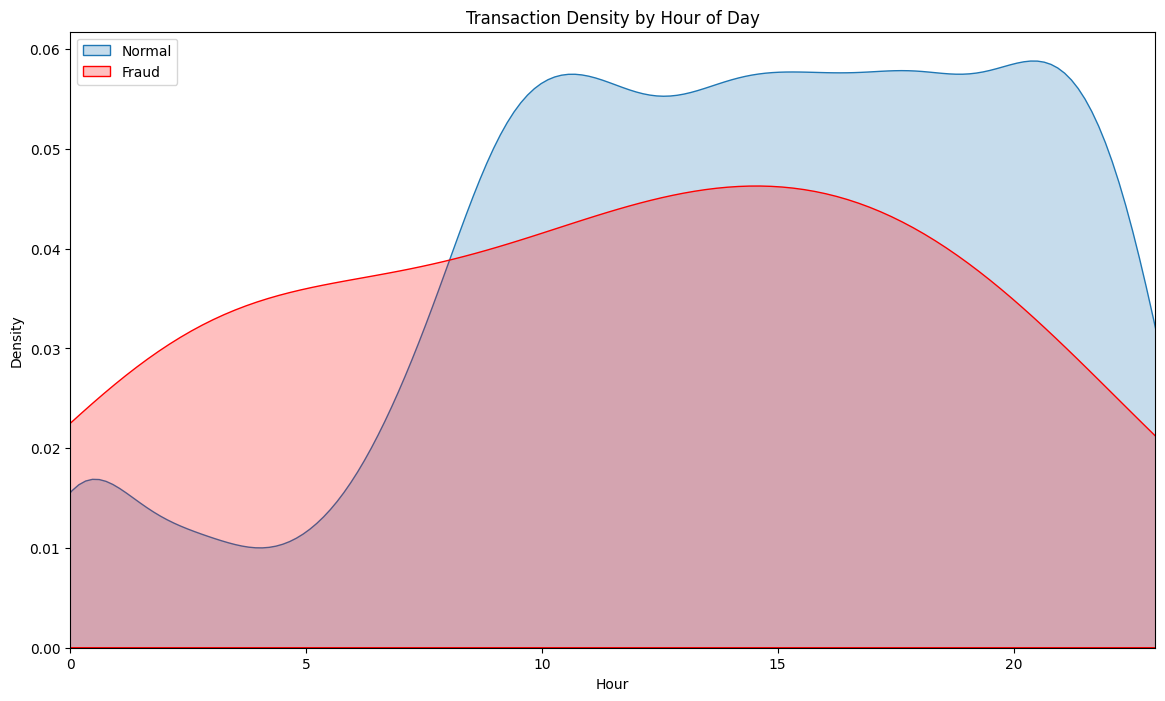

In [12]:
df["Hour"] = df["Time"].apply(lambda x: np.floor(x / 3600) % 24)

plt.figure(figsize=(14, 8))

# Plot the distribution of Fraud vs Normal transactions across hours
sns.kdeplot(df[df["Class"] == 0]["Hour"], label="Normal", fill=True, bw_adjust=2)
sns.kdeplot(df[df["Class"] == 1]["Hour"], label="Fraud", fill=True, color="red", bw_adjust=2)

plt.title("Transaction Density by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.legend()
plt.xlim(0, 23)
plt.show()

# Subsets against each other

This is to see if we can catch any clustering

Top 3 Features selected for Pairplot: ['V11', 'V4', 'V2']


<Figure size 1400x800 with 0 Axes>

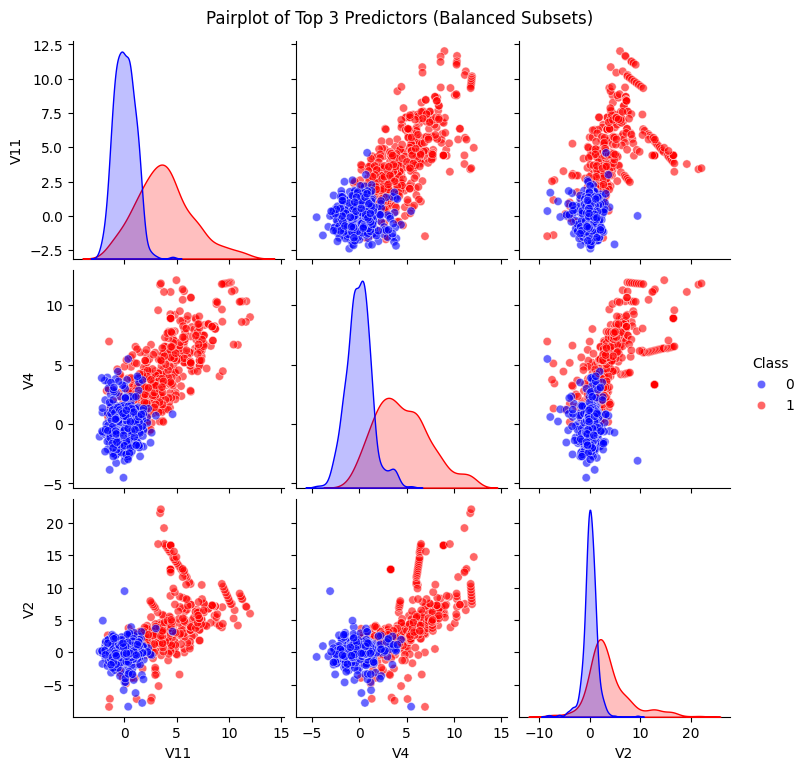

In [13]:
# Pairplot of Top 3 feature against each other
top_features = correlations.drop("Class").nlargest(3).index.tolist()
print(f"Top 3 Features selected for Pairplot: {top_features}")

# 2. Create a balanced subset for visualization
fraud_df = df[df["Class"] == 1]
normal_df = df[df["Class"] == 0].sample(n=len(fraud_df), random_state=42)
plot_df = pd.concat([fraud_df, normal_df])

# 3. Create the Pairplot
plt.figure(figsize=(14, 8))
pp = sns.pairplot(plot_df, 
                  vars=top_features, 
                  hue="Class", 
                  palette={0: "blue", 1: "red"},
                  kind="scatter",
                  diag_kind="kde", # Shows density on the diagonal
                  plot_kws={"alpha": 0.6})

pp.fig.suptitle("Pairplot of Top 3 Predictors (Balanced Subsets)", y=1.02)
plt.show()

# Preprocessing

We already checked for missing data shortly after we imported our dataset and dataset does not include any missing row or data.

For duplicate data

In [14]:
befor_dup = len(df)
df_clean = df.drop_duplicates()
after_dup = len(df_clean)
print(f"Number of duplicates: {befor_dup - after_dup}")

Number of duplicates: 1081


Feature scaling

In [15]:
scaler = RobustScaler()

df_clean["scaled_amount"] = scaler.fit_transform(df_clean["Amount"].values.reshape(-1,1))
df_clean["scaled_time"] = scaler.fit_transform(df_clean["Time"].values.reshape(-1,1))
df_clean["log_amount"] = np.log(df_clean["scaled_amount"] + 1e-9 + abs(df_clean["scaled_amount"].min()))

# Drop the old unscaled columns
df_clean.drop(["Time", "Amount"], axis=1, inplace=True)

Outlier Detection
I prefer to not remove the outlier because it might be part of the information encoded on PCA transformed data

In [16]:
feature_list_sorted = correlations.drop(["Class", "Amount", "Time"]).index.tolist()
print(f"Outlier Detection Targets (sorted via r-scores): {feature_list_sorted}.")

# Quartiles
Q1 = df_clean[feature_list_sorted].quantile(0.25)
Q3 = df_clean[feature_list_sorted].quantile(0.75)
IQR = Q3 - Q1

# Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_count = ((df_clean[feature_list_sorted] < lower_bound) | (df_clean[feature_list_sorted] > upper_bound)).sum()

for col, count in outlier_count.items():
    print(f" - {col}: {count} outliers detected")

Outlier Detection Targets (sorted via r-scores): ['V11', 'V4', 'V2', 'V21', 'V19', 'V20', 'V8', 'V27', 'V28', 'V26', 'V25', 'V22', 'V23', 'V15', 'V13', 'V24', 'V6', 'V5', 'V9', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17'].
 - V11: 735 outliers detected
 - V4: 11094 outliers detected
 - V2: 13390 outliers detected
 - V21: 14401 outliers detected
 - V19: 10150 outliers detected
 - V20: 27553 outliers detected
 - V8: 23904 outliers detected
 - V27: 38799 outliers detected
 - V28: 30094 outliers detected
 - V26: 5665 outliers detected
 - V25: 5333 outliers detected
 - V22: 1298 outliers detected
 - V23: 18467 outliers detected
 - V15: 2884 outliers detected
 - V13: 3362 outliers detected
 - V24: 4758 outliers detected
 - V6: 22886 outliers detected
 - V5: 12221 outliers detected
 - V9: 8199 outliers detected
 - V1: 6948 outliers detected
 - V18: 7468 outliers detected
 - V7: 8839 outliers detected
 - V3: 3306 outliers detected
 - V16: 8180 outliers detected
 - V10: 9345 outl

Dividing train and test data. Our ratios will be %60 Train data, %20 Validation data, %20 Test data.

In [17]:
X = df_clean.drop("Class", axis = 1) # Model inputs
y = df_clean.Class   # Model outputs

X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_val_train, y_val_train,
    test_size=1/9,
    random_state=13,
    shuffle=True
)

print(f"Train shape {X_train.shape}, Test shape {X_test.shape}, Validation shape {X_val.shape}")
print(f"Train set Non-Fraud Ratio:       {y_train.value_counts(normalize=True)[0]:.4%}")
print(f"Test set Non-Fraud Ratio:        {y_test.value_counts(normalize=True)[0]:.4%}")
print(f"Validation set Non-Fraud Ratio:  {y_val.value_counts(normalize=True)[0]:.4%}")

Train shape (226980, 32), Test shape (28373, 32), Validation shape (28373, 32)
Train set Non-Fraud Ratio:       99.8291%
Test set Non-Fraud Ratio:        99.8343%
Validation set Non-Fraud Ratio:  99.8661%


The class imbalance in this dataset is significant (0.17% fraud). A naive model that predicts only the majority class (y=0) would achieve 99% accuracy, but it would fail completely at the primary objective: detecting fraud (Recall = 0).

Therefore, standard algorithms like Logistic Regression will be ineffective unless adapted. To train a useful model, we cannot rely on accuracy; we must optimize for Recall and AUPRC. Furthermore, we must implement specific strategies to overcome this bias, such as Resampling or Cost-Sensitive Learning, rather than just relying on more complex algorithms.

## Model evaluator code:

In [18]:
results = []


def evaluate_model(name, model, X_tr, y_tr, sampling_method, with_graph=False):
    # Train
    model.fit(X_tr, y_tr)
    
    # Predict on Validation Set
    # We use predict_proba for AUPRC
    y_prob = model.predict_proba(X_val)[:, 1]
    y_pred = model.predict(X_val)
    
    # Calculate Metrics
    auprc = average_precision_score(y_val, y_prob)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Log results
    results.append({
        "Model": name,
        "Sampling Technique": sampling_method,
        "AUPRC": auprc,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

    # Generate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    if with_graph:
        plt.figure(figsize=(14, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix - {name} ({sampling_method})")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

    return classification_report(y_val, y_pred)

## Logistic regression models

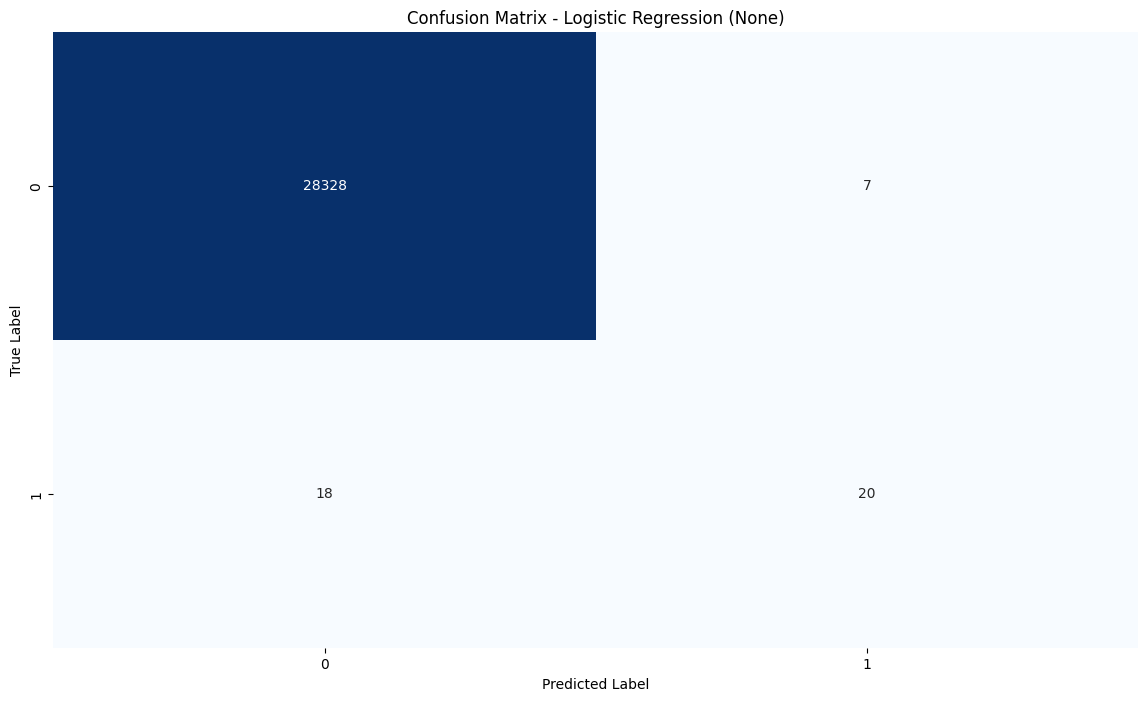

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.74      0.53      0.62        38

    accuracy                           1.00     28373
   macro avg       0.87      0.76      0.81     28373
weighted avg       1.00      1.00      1.00     28373



In [19]:
model1 = LogisticRegression(max_iter=1000)
model1_results = evaluate_model("Logistic Regression", model1, X_train, y_train, "None", with_graph=True)
print(model1_results)

In [20]:
for _ in [0.1, 1, 6, 10, 100, 1000]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model1_with_weights = LogisticRegression(max_iter=1000, class_weight={0:1, 1:_})
    model1_weights_results = evaluate_model("Logistic Regression", model1_with_weights, X_train, y_train, f"Class Weights{{0:1, 1:{_}}}")
    print(model1_weights_results)

Class weights: {0:1, 1:0.1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.78      0.18      0.30        38

    accuracy                           1.00     28373
   macro avg       0.89      0.59      0.65     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.74      0.53      0.62        38

    accuracy                           1.00     28373
   macro avg       0.87      0.76      0.81     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:6}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.72      0.89      0.80        38

    accuracy                           1.00     28373
   macro avg       0.86      0.95      0.90     

SMOTE"d dataset

In [21]:
X_train_smote, y_train_smote = SMOTE(random_state=13).fit_resample(X_train, y_train)

In [22]:
for _ in [0.1, 1, 6, 10, 100, 1000]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model1_with_weights = LogisticRegression(max_iter=1000, class_weight={0:1, 1:_})
    model1_weights_results = evaluate_model("Logistic Regression", model1_with_weights, X_train_smote, y_train_smote, f"SMOTE"d/Class Weights{{0:1, 1:{_}}}")
    print(model1_weights_results)

Class weights: {0:1, 1:0.1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.37      0.97      0.54        38

    accuracy                           1.00     28373
   macro avg       0.68      0.99      0.77     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:1}
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     28335
           1       0.05      1.00      0.09        38

    accuracy                           0.97     28373
   macro avg       0.52      0.99      0.54     28373
weighted avg       1.00      0.97      0.99     28373

Class weights: {0:1, 1:6}
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     28335
           1       0.01      1.00      0.03        38

    accuracy                           0.90     28373
   macro avg       0.51      0.95      0.49     

In [23]:
X_train_under, y_train_under = RandomUnderSampler(random_state=13).fit_resample(X_train, y_train)

In [24]:
for _ in [0.1, 1, 6, 10, 100, 1000]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model1_with_weights = LogisticRegression(max_iter=1000, class_weight={0:1, 1:_})
    model1_weights_results = evaluate_model("Logistic Regression", model1_with_weights, X_train_under, y_train_under, f"Under-sampled/Class Weights{{0:1, 1:{_}}}")
    print(model1_weights_results)

Class weights: {0:1, 1:0.1}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28335
           1       0.08      0.97      0.15        38

    accuracy                           0.99     28373
   macro avg       0.54      0.98      0.57     28373
weighted avg       1.00      0.99      0.99     28373

Class weights: {0:1, 1:1}
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     28335
           1       0.02      1.00      0.05        38

    accuracy                           0.95     28373
   macro avg       0.51      0.97      0.51     28373
weighted avg       1.00      0.95      0.97     28373

Class weights: {0:1, 1:6}
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     28335
           1       0.01      1.00      0.02        38

    accuracy                           0.86     28373
   macro avg       0.50      0.93      0.47     

## Random Forest Models

Plain:

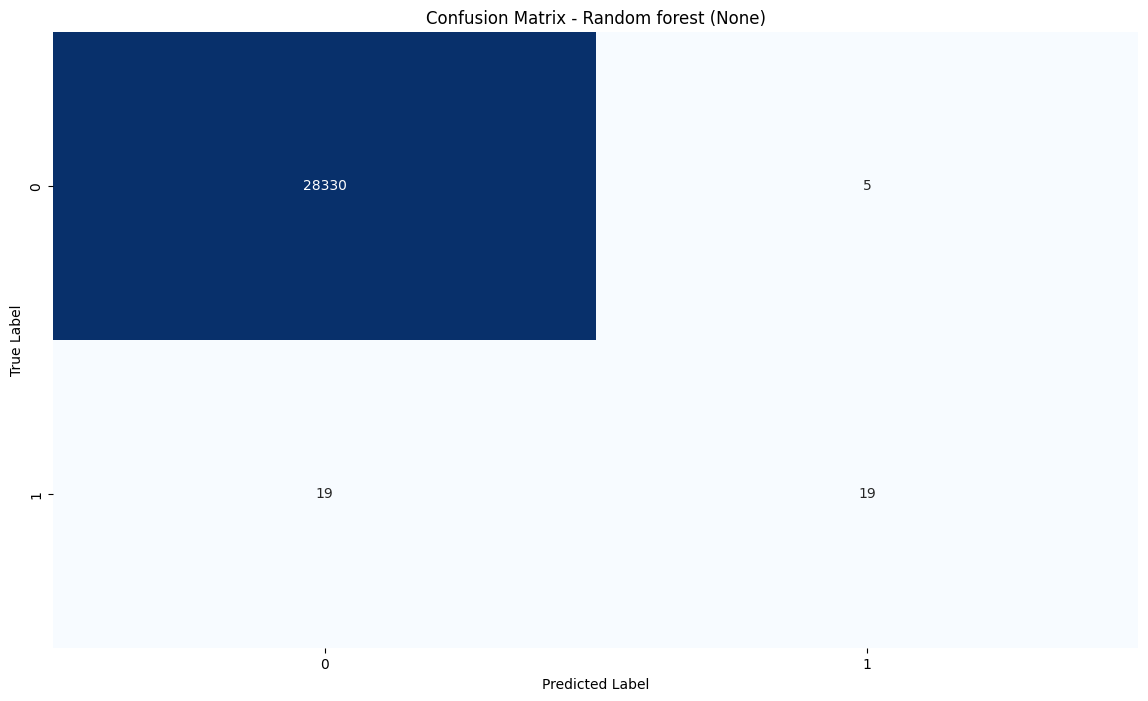

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.79      0.50      0.61        38

    accuracy                           1.00     28373
   macro avg       0.90      0.75      0.81     28373
weighted avg       1.00      1.00      1.00     28373



In [25]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=13, n_jobs=-1)
model2_results = evaluate_model("Random forest", model2, X_train, y_train, "None", with_graph=True)
print(model2_results)

In [26]:
for _ in [0.1, 1, 10, 100, 1000]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model2_with_weights = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=13, n_jobs=-1, class_weight={0:1, 1:_})
    model2_weights_results = evaluate_model("Random forest", model2_with_weights, X_train, y_train, f"Class Weights {{0:1, 1:{_}}}")
    print(model2_weights_results)

Class weights: {0:1, 1:0.1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       1.00      0.29      0.45        38

    accuracy                           1.00     28373
   macro avg       1.00      0.64      0.72     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.79      0.50      0.61        38

    accuracy                           1.00     28373
   macro avg       0.90      0.75      0.81     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.81      0.79      0.80        38

    accuracy                           1.00     28373
   macro avg       0.91      0.89      0.90    

#### Best one on the random forest 

Class weights: {0:1, 1:50}


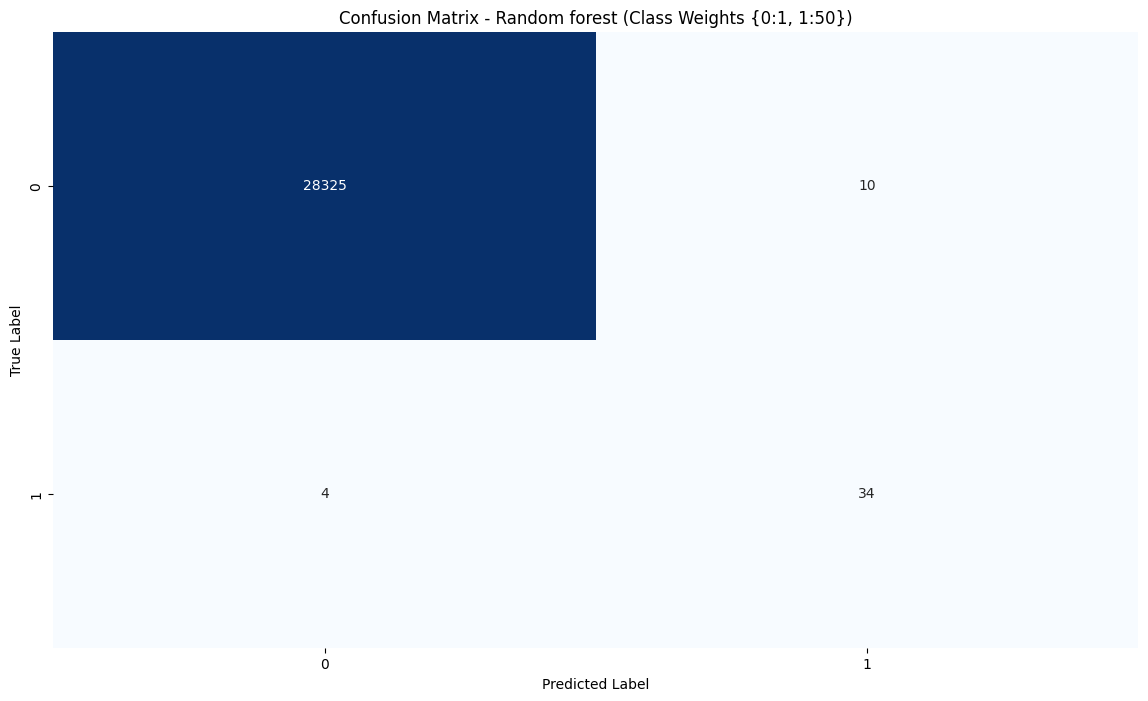

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.77      0.89      0.83        38

    accuracy                           1.00     28373
   macro avg       0.89      0.95      0.91     28373
weighted avg       1.00      1.00      1.00     28373



In [27]:
for _ in [50]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model2_with_weights = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=13, n_jobs=-1, class_weight={0:1, 1:_})
    model2_weights_results = evaluate_model("Random forest", model2_with_weights, X_train, y_train, f"Class Weights {{0:1, 1:{_}}}", with_graph=True)
    print(model2_weights_results)

In [28]:
for _ in [0.1, 1, 10, 100, 1000]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model2_smote = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=13, n_jobs=-1, class_weight={0:1, 1:_})
    model2_smote_results = evaluate_model("Random forest", model2_smote, X_train_smote, y_train_smote, f"SMOTE"d/Class Weights {{0:1, 1:{_}}}")
    print(model2_smote_results)

Class weights: {0:1, 1:0.1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.77      0.95      0.85        38

    accuracy                           1.00     28373
   macro avg       0.88      0.97      0.92     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.21      0.97      0.34        38

    accuracy                           1.00     28373
   macro avg       0.60      0.98      0.67     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:10}
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     28335
           1       0.00      1.00      0.01        38

    accuracy                           0.71     28373
   macro avg       0.50      0.86      0.42    

## Gradient boost

it took so long i had to restart python kernel multiple times so i did not like this model

In [29]:
for _ in [1]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model3 = GradientBoostingClassifier(n_estimators=100, random_state=13)
    model3_results = evaluate_model("Gradient Boosting", model3, X_train, y_train, "None")
    print(model3_results)

Class weights: {0:1, 1:1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.58      0.29      0.39        38

    accuracy                           1.00     28373
   macro avg       0.79      0.64      0.69     28373
weighted avg       1.00      1.00      1.00     28373



XGboost is an optimized version of gradient boosting. As we can see it has a better performance and better fscore in our dataset.

c:\projects_last\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:37:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


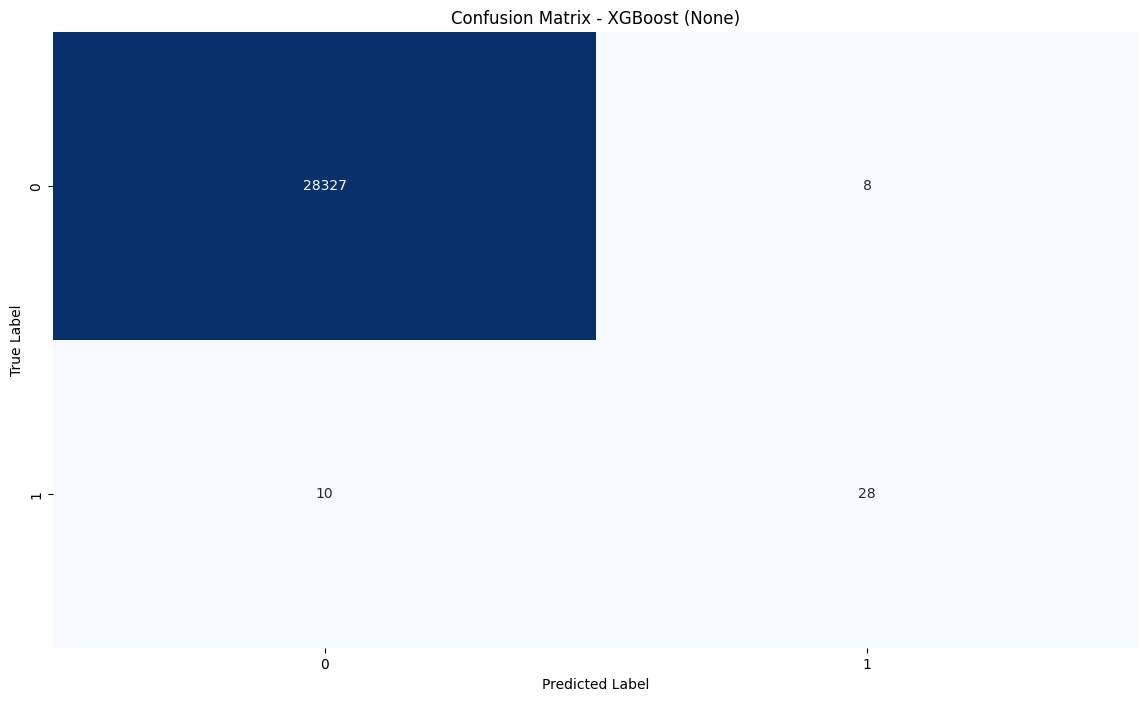

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.78      0.74      0.76        38

    accuracy                           1.00     28373
   macro avg       0.89      0.87      0.88     28373
weighted avg       1.00      1.00      1.00     28373



In [30]:
model3_xbg = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", random_state=13, n_jobs=-1)
model3_xbg_results = evaluate_model("XGBoost", model3_xbg, X_train, y_train, "None", with_graph=True)
print(model3_xbg_results)

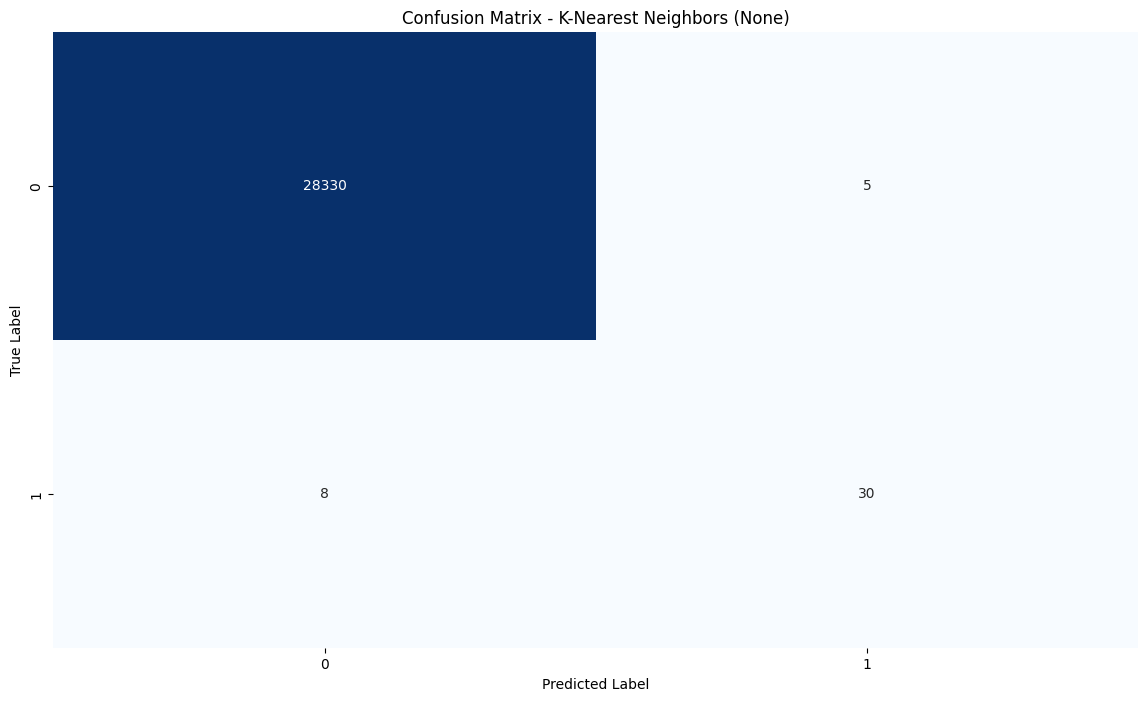

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.86      0.79      0.82        38

    accuracy                           1.00     28373
   macro avg       0.93      0.89      0.91     28373
weighted avg       1.00      1.00      1.00     28373



In [31]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_results = evaluate_model("K-Nearest Neighbors", knn, X_train, y_train, "None", with_graph=True)
print(knn_results)

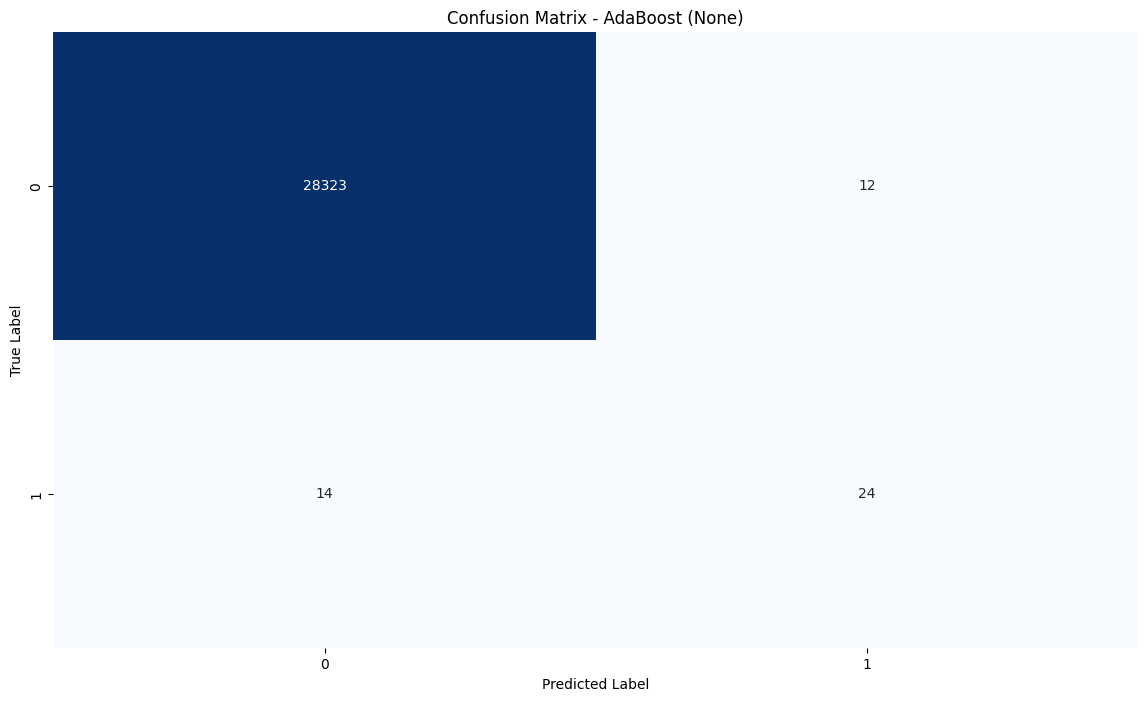

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.67      0.63      0.65        38

    accuracy                           1.00     28373
   macro avg       0.83      0.82      0.82     28373
weighted avg       1.00      1.00      1.00     28373



In [32]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=13)
ada_boost_results = evaluate_model("AdaBoost", ada_boost, X_train, y_train, "None", with_graph=True)
print(ada_boost_results)

In [33]:
for _ in [0.001, 0.01, 0.1, 0.2, 1, 10, 100]:
    ada_boost = AdaBoostClassifier(n_estimators=100, random_state=13, learning_rate=_)
    ada_boost_results = evaluate_model("AdaBoost", ada_boost, X_train, y_train, f"Learning Rate: {_}", with_graph=False)
    print(ada_boost_results)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.63      0.58      0.60        38

    accuracy                           1.00     28373
   macro avg       0.81      0.79      0.80     28373
weighted avg       1.00      1.00      1.00     28373

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.73      0.50      0.59        38

    accuracy                           1.00     28373
   macro avg       0.87      0.75      0.80     28373
weighted avg       1.00      1.00      1.00     28373

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.75      0.39      0.52        38

    accuracy                           1.00     28373
   macro avg       0.87      0.70      0.76     28373
weighted avg       1.00      1.00      1.00     28373

              preci

KeyboardInterrupt: 

[LightGBM] [Info] Number of positive: 388, number of negative: 226592
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7929
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001709 -> initscore=-6.369901
[LightGBM] [Info] Start training from score -6.369901


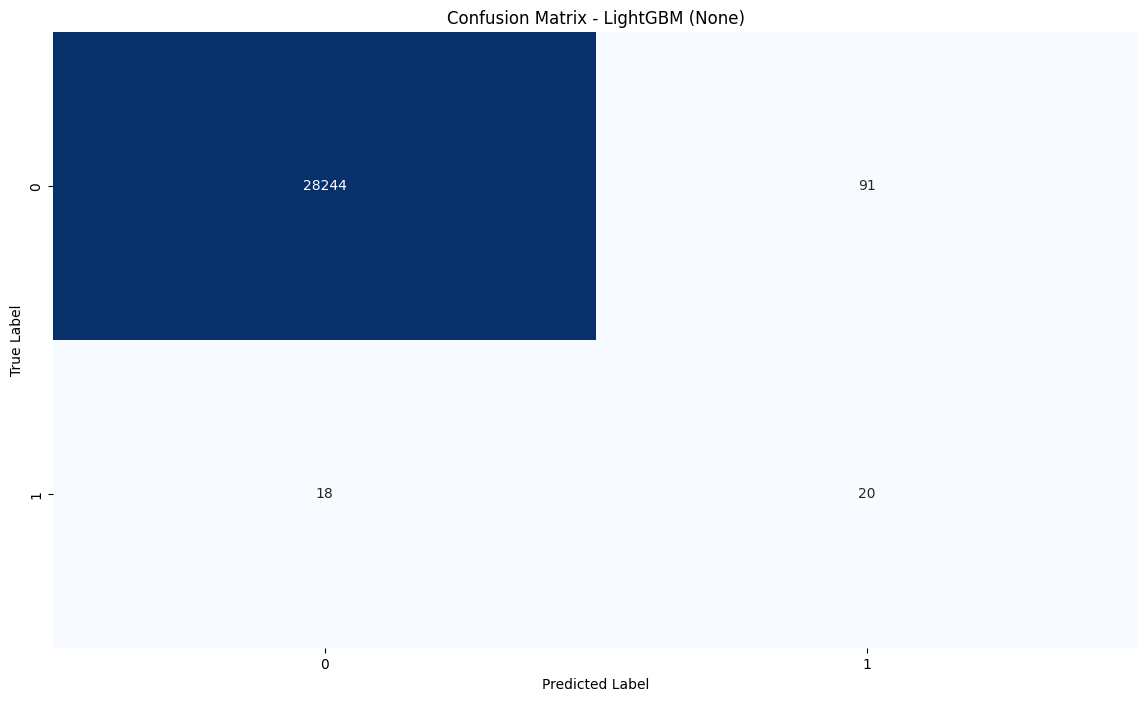

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.18      0.53      0.27        38

    accuracy                           1.00     28373
   macro avg       0.59      0.76      0.63     28373
weighted avg       1.00      1.00      1.00     28373



In [34]:
lgmb = LGBMClassifier(n_estimators=100, random_state=13, n_jobs=-1)
lgmb_results = evaluate_model("LightGBM", lgmb, X_train, y_train, "None", with_graph=True)
print(lgmb_results)

In [35]:
for _ in [0.001, 0.01, 0.1, 0.2, 1, 10, 100]:
    lgm_model = LGBMClassifier(n_estimators=100, random_state=13, learning_rate=_)
    lgm_model_results = evaluate_model("LightGBM", lgm_model, X_train, y_train, f"Learning Rate: {_}", with_graph=False)
    print(lgm_model_results)

[LightGBM] [Info] Number of positive: 388, number of negative: 226592
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7929
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001709 -> initscore=-6.369901
[LightGBM] [Info] Start training from score -6.369901


c:\projects_last\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\projects_last\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\projects_last\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\projects_last\.venv\Lib\site-packages\s

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.00      0.00      0.00        38

    accuracy                           1.00     28373
   macro avg       0.50      0.50      0.50     28373
weighted avg       1.00      1.00      1.00     28373

[LightGBM] [Info] Number of positive: 388, number of negative: 226592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7929
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001709 -> initscore=-6.369901
[LightGBM] [Info] Start training from score -6.369901
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
      

Catboost is a really fast gradiant boosting algorithm that uses categorical boosting.

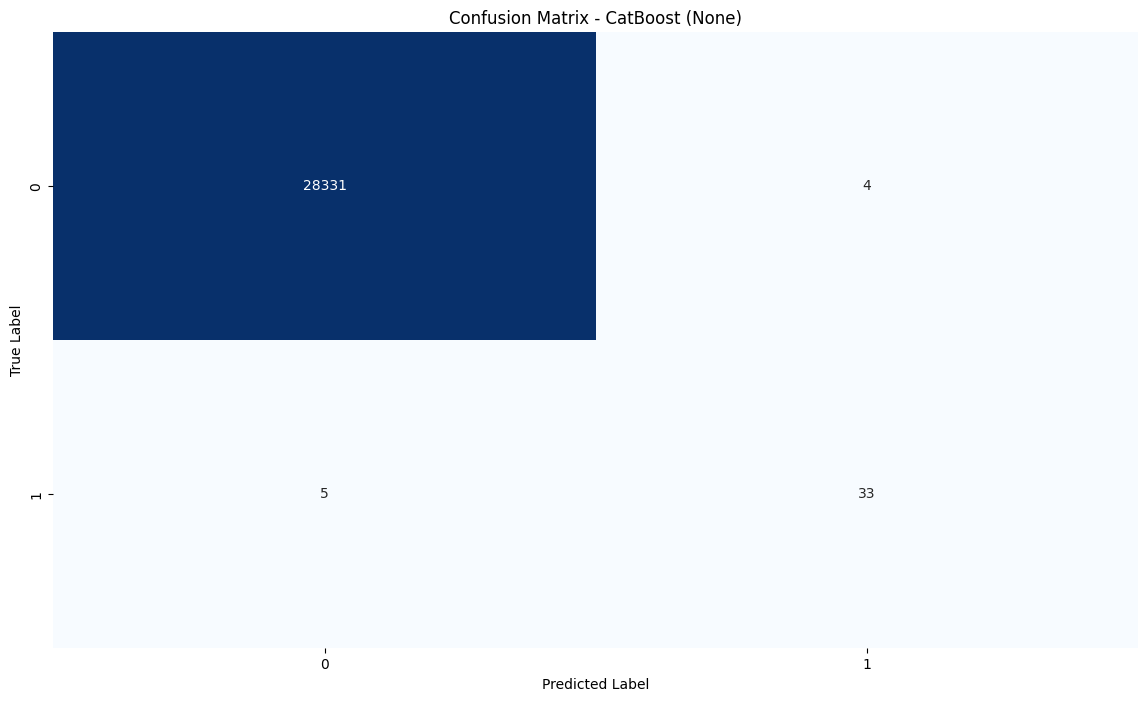

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.89      0.87      0.88        38

    accuracy                           1.00     28373
   macro avg       0.95      0.93      0.94     28373
weighted avg       1.00      1.00      1.00     28373



In [36]:
cb_plain = CatBoostClassifier(iterations=200, random_seed=13, verbose=0, thread_count=-1)
cb_plain_results = evaluate_model("CatBoost", cb_plain, X_train, y_train, "None", with_graph=True)
print(cb_plain_results)

In [37]:
for _ in [0.1, 1, 10, 50, 100]:
    model_catboost = CatBoostClassifier(iterations=200, random_seed=13, verbose=0, thread_count=-1, class_weights=[1, _])
    res = evaluate_model("CatBoost", model_catboost, X_train, y_train, f"Class Weights{{0:1, 1:{_}}}")
    print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.97      0.87      0.92        38

    accuracy                           1.00     28373
   macro avg       0.99      0.93      0.96     28373
weighted avg       1.00      1.00      1.00     28373

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.89      0.87      0.88        38

    accuracy                           1.00     28373
   macro avg       0.95      0.93      0.94     28373
weighted avg       1.00      1.00      1.00     28373

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.95      0.92      0.93        38

    accuracy                           1.00     28373
   macro avg       0.97      0.96      0.97     28373
weighted avg       1.00      1.00      1.00     28373

              preci

In [56]:
results_df = pd.DataFrame(results)
print(f"\n--- FINAL COMPARISON TABLE --- // {results_df.shape}")
print(results_df.sort_values(by="AUPRC", ascending=False).to_markdown(index=False))


--- FINAL COMPARISON TABLE --- // (54, 6)
| Model               | Sampling Technique                       |      AUPRC |   Recall |   Precision |   F1 Score |
|:--------------------|:-----------------------------------------|-----------:|---------:|------------:|-----------:|
| CatBoost            | Class Weights{0:1, 1:50}                 | 0.952778   | 0.921053 |  0.853659   | 0.886076   |
| LightGBM            | Learning Rate: 0.001                     | 0.941123   | 0        |  0          | 0          |
| CatBoost            | Class Weights{0:1, 1:0.1}                | 0.94048    | 0.868421 |  0.970588   | 0.916667   |
| CatBoost            | Class Weights{0:1, 1:1}                  | 0.936896   | 0.868421 |  0.891892   | 0.88       |
| CatBoost            | None                                     | 0.936896   | 0.868421 |  0.891892   | 0.88       |
| LightGBM            | Learning Rate: 0.01                      | 0.934952   | 0.763158 |  0.90625    | 0.828571   |
| CatBoost   

In [47]:
def objective(trial, model_name, X_tr, y_tr):
    """
    Objective function for Optuna hyperparameter tuning.
    Returns AUPRC score for validation set.
    """
    
    if model_name == "LogisticRegression":
        C = trial.suggest_float("C", 1e-4, 1e2, log=True)
        class_weight = trial.suggest_categorical("class_weight", [None, "balanced", {0: 1, 1: 10}, {0: 1, 1: 50}])
        model = LogisticRegression(C=C, class_weight=class_weight, max_iter=1000, random_state=13)
    
    elif model_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 50, 200)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        class_weight = trial.suggest_categorical("class_weight", [None, "balanced", {0: 1, 1: 10}, {0: 1, 1: 50}])
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                      min_samples_split=min_samples_split, class_weight=class_weight,
                                      random_state=13, n_jobs=-1)
    
    elif model_name == "XGBoost":
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        n_estimators = trial.suggest_int("n_estimators", 50, 200)
        scale_pos_weight = trial.suggest_float("scale_pos_weight", 1, 100)
        model = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators,
                             scale_pos_weight=scale_pos_weight, eval_metric="logloss", random_state=13, n_jobs=-1)
    
    elif model_name == "CatBoost":
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        iterations = trial.suggest_int("iterations", 100, 300)
        class_weights = trial.suggest_categorical("class_weights", [[1, 10], [1, 50], [1, 100]])
        model = CatBoostClassifier(learning_rate=learning_rate, max_depth=max_depth, iterations=iterations,
                                  class_weights=class_weights, verbose=0, random_seed=13, thread_count=-1)
    
    elif model_name == "KNN":
        n_neighbors = trial.suggest_int("n_neighbors", 3, 15)
        weights = trial.suggest_categorical("weights", ["uniform", "distance"])
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, n_jobs=-1)
    
    # Train and evaluate
    model.fit(X_tr, y_tr)
    y_prob = model.predict_proba(X_val)[:, 1]
    auprc = average_precision_score(y_val, y_prob)
    
    return auprc


def run_hyperparameter_tuning(model_name, n_trials=100):
    """
    Run Optuna hyperparameter tuning for specified model.
    """
    sampler = TPESampler(seed=13)
    pruner = MedianPruner(n_warmup_steps=5)
    
    study = optuna.create_study(direction="maximize", sampler=sampler, pruner=pruner)
    study.optimize(lambda trial: objective(trial, model_name, X_train, y_train), 
                   n_trials=n_trials, show_progress_bar=True)
    
    print(f"\n{"="*60}")
    print(f"Best trial for {model_name}:")
    print(f"{"="*60}")
    print(f"AUPRC: {study.best_value:.4f}")
    print(f"Best hyperparameters: {study.best_params}")
    
    return study.best_params, study


best_params, study = run_hyperparameter_tuning("CatBoost", n_trials=10)

[I 2026-01-27 16:19:30,937] A new study created in memory with name: no-name-38b8cab1-23b2-494d-9e9f-6b853be57a3e
Best trial: 0. Best value: 0.894838:  10%|█         | 1/10 [00:19<02:57, 19.71s/it]c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 50] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 100] which is of type list.
  optuna_warn(message)


[I 2026-01-27 16:19:50,642] Trial 0 finished with value: 0.894837657848266 and parameters: {'learning_rate': 0.14085126782862584, 'max_depth': 4, 'iterations': 265, 'class_weights': [1, 50]}. Best is trial 0 with value: 0.894837657848266.


Best trial: 1. Best value: 0.925254:  20%|██        | 2/10 [01:00<04:14, 31.85s/it]c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 50] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 100] which is of type list.
  optuna_warn(message)


[I 2026-01-27 16:20:30,997] Trial 1 finished with value: 0.9252540086788246 and parameters: {'learning_rate': 0.07936509981223044, 'max_depth': 9, 'iterations': 228, 'class_weights': [1, 10]}. Best is trial 1 with value: 0.9252540086788246.


Best trial: 1. Best value: 0.925254:  30%|███       | 3/10 [01:30<03:38, 31.19s/it]c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 50] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 100] which is of type list.
  optuna_warn(message)


[I 2026-01-27 16:21:01,397] Trial 2 finished with value: 0.920830842016939 and parameters: {'learning_rate': 0.012201972599808023, 'max_depth': 9, 'iterations': 174, 'class_weights': [1, 10]}. Best is trial 1 with value: 0.9252540086788246.


Best trial: 1. Best value: 0.925254:  40%|████      | 4/10 [01:57<02:56, 29.47s/it]c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 50] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 100] which is of type list.
  optuna_warn(message)


[I 2026-01-27 16:21:28,222] Trial 3 finished with value: 0.7918355440164097 and parameters: {'learning_rate': 0.010325326720182168, 'max_depth': 5, 'iterations': 290, 'class_weights': [1, 100]}. Best is trial 1 with value: 0.9252540086788246.


Best trial: 1. Best value: 0.925254:  50%|█████     | 5/10 [02:10<01:57, 23.59s/it]c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 50] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 100] which is of type list.
  optuna_warn(message)


[I 2026-01-27 16:21:41,401] Trial 4 finished with value: 0.8054509652475367 and parameters: {'learning_rate': 0.0111461679782569, 'max_depth': 3, 'iterations': 226, 'class_weights': [1, 10]}. Best is trial 1 with value: 0.9252540086788246.


Best trial: 1. Best value: 0.925254:  60%|██████    | 6/10 [02:24<01:20, 20.22s/it]c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 50] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 100] which is of type list.
  optuna_warn(message)


[I 2026-01-27 16:21:55,083] Trial 5 finished with value: 0.8557448183475516 and parameters: {'learning_rate': 0.15873217619230007, 'max_depth': 3, 'iterations': 231, 'class_weights': [1, 100]}. Best is trial 1 with value: 0.9252540086788246.


Best trial: 1. Best value: 0.925254:  70%|███████   | 7/10 [02:40<00:56, 18.84s/it]c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 50] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 100] which is of type list.
  optuna_warn(message)


[I 2026-01-27 16:22:11,078] Trial 6 finished with value: 0.7807868835831475 and parameters: {'learning_rate': 0.010000409293826099, 'max_depth': 4, 'iterations': 243, 'class_weights': [1, 100]}. Best is trial 1 with value: 0.9252540086788246.


Best trial: 1. Best value: 0.925254:  80%|████████  | 8/10 [02:57<00:36, 18.39s/it]c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 50] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 100] which is of type list.
  optuna_warn(message)


[I 2026-01-27 16:22:28,489] Trial 7 finished with value: 0.9026186985897946 and parameters: {'learning_rate': 0.22741144132594204, 'max_depth': 4, 'iterations': 192, 'class_weights': [1, 100]}. Best is trial 1 with value: 0.9252540086788246.


Best trial: 1. Best value: 0.925254:  90%|█████████ | 9/10 [03:18<00:19, 19.21s/it]c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 10] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 50] which is of type list.
  optuna_warn(message)
c:\projects_last\.venv\Lib\site-packages\optuna\distributions.py:502: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [1, 100] which is of type list.
  optuna_warn(message)


[I 2026-01-27 16:22:49,527] Trial 8 finished with value: 0.9215014863415719 and parameters: {'learning_rate': 0.13832385457509597, 'max_depth': 3, 'iterations': 237, 'class_weights': [1, 10]}. Best is trial 1 with value: 0.9252540086788246.


Best trial: 1. Best value: 0.925254: 100%|██████████| 10/10 [03:40<00:00, 22.01s/it]

[I 2026-01-27 16:23:11,006] Trial 9 finished with value: 0.8980769914379899 and parameters: {'learning_rate': 0.023052634987453493, 'max_depth': 4, 'iterations': 286, 'class_weights': [1, 10]}. Best is trial 1 with value: 0.9252540086788246.

Best trial for CatBoost:
AUPRC: 0.9253
Best hyperparameters: {'learning_rate': 0.07936509981223044, 'max_depth': 9, 'iterations': 228, 'class_weights': [1, 10]}


Epoch 1/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9967 - loss: 0.1302 - val_accuracy: 0.9990 - val_loss: 0.0087
Epoch 2/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9980 - loss: 0.0687 - val_accuracy: 0.9976 - val_loss: 0.0182
Epoch 3/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9978 - loss: 0.0645 - val_accuracy: 0.9986 - val_loss: 0.0129
Epoch 4/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9981 - loss: 0.0553 - val_accuracy: 0.9989 - val_loss: 0.0137
Epoch 5/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9979 - loss: 0.0593 - val_accuracy: 0.9983 - val_loss: 0.0121
Epoch 6/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9980 - loss: 0.0520 - val_accuracy: 0.9985 - val_loss: 0.0067
Epoch 7/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9981 - loss: 0.0469 - val_accuracy: 0.9987 - val_loss: 0.0074
Epoch 8/20
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9977 - loss: 0

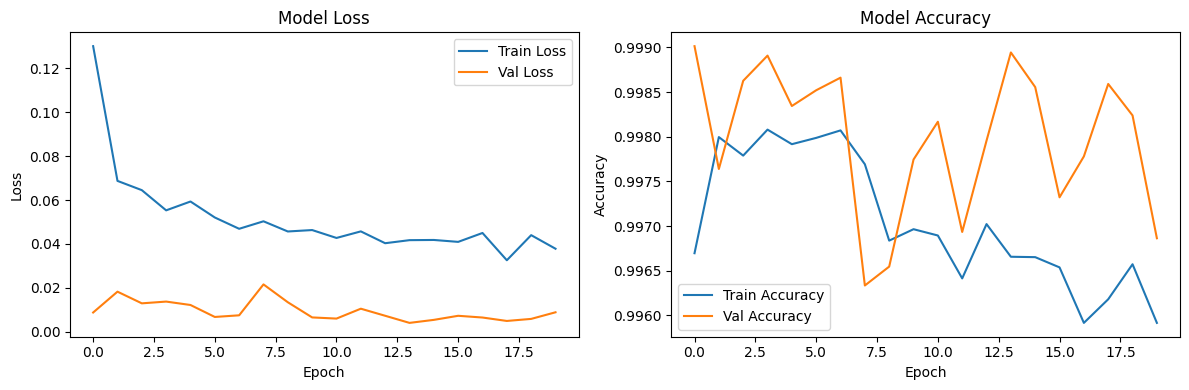

In [55]:
warnings.filterwarnings("ignore")

# Prepare data with StandardScaler for neural networks
scaler_nn = StandardScaler()
X_train_scaled = scaler_nn.fit_transform(X_train)
X_val_scaled = scaler_nn.transform(X_val)
X_test_scaled = scaler_nn.transform(X_test)

# Build neural network with 2 hidden layers
model_nn = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

# Compile with class weight adjustment for imbalanced data
model_nn.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model_nn.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    batch_size=32,
    class_weight={0: 1, 1: 50},
    verbose=1
)

# Evaluate on validation set
y_pred_nn = model_nn.predict(X_val_scaled)
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int).flatten()

auprc_nn = average_precision_score(y_val, y_pred_nn)
recall_nn = recall_score(y_val, y_pred_nn_binary)
precision_nn = precision_score(y_val, y_pred_nn_binary)
f1_nn = f1_score(y_val, y_pred_nn_binary)

results.append({
    "Model": "Neural Network",
    "Sampling Technique": "2 Hidden Layers (64, 32)",
    "AUPRC": auprc_nn,
    "Recall": recall_nn,
    "Precision": precision_nn,
    "F1 Score": f1_nn
})

print(f"Neural Network Results:")
print(f"AUPRC: {auprc_nn:.4f}, Recall: {recall_nn:.4f}, Precision: {precision_nn:.4f}, F1: {f1_nn:.4f}")
print(classification_report(y_val, y_pred_nn_binary))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        ce = -(
            y_true * tf.math.log(y_pred) +
            (1 - y_true) * tf.math.log(1 - y_pred)
        )
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        fl = alpha * tf.pow(1 - p_t, gamma) * ce
        return tf.reduce_mean(fl)
    return loss

In [ ]:
warnings.filterwarnings("ignore")

# =======================
# Scale data
# =======================
scaler_nn = StandardScaler()
X_train_scaled = scaler_nn.fit_transform(X_train)
X_val_scaled = scaler_nn.transform(X_val)
X_test_scaled = scaler_nn.transform(X_test)

# =======================
# Build model
# =======================
model_nn = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])



# =======================
# Compile (AUPRC ONLY)
# =======================
model_nn.compile(
    optimizer='adam',
    loss=focal_loss,
    metrics=[
        keras.metrics.AUC(
            name="auprc",
            curve="PR"
        )
    ]
)

# =======================
# Early stopping on AUPRC
# =======================
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_auprc",
        mode="max",
        patience=5,
        restore_best_weights=True
    )
]

# =======================
# Train
# =======================
history = model_nn.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# =======================
# Evaluate (AUPRC only)
# =======================
y_val_pred = model_nn.predict(X_val_scaled).ravel()
auprc_nn = average_precision_score(y_val, y_val_pred)

print(f"Neural Network Validation AUPRC: {auprc_nn:.4f}")

Epoch 1/20
 225/7094 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.8687 - auprc: 3.9981e-04 - loss: 0.8759

KeyboardInterrupt: 